# Tackling distributions

In [214]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import math

In [300]:
### Play-By-Play data for 2022
df_pbp = nfl.import_pbp_data(years=[2021])

### Players
df_players = nfl.import_rosters([2021])
### Teams
df_teams = nfl.import_team_desc()

2021 done.
Downcasting floats.


In [301]:
df_solo_tackles = df_pbp[df_pbp['solo_tackle']==1.]

In [302]:
df_solo_tackles = df_solo_tackles.merge(df_players[["player_id", "player_name", "position", "team"]], left_on="solo_tackle_1_player_id", right_on="player_id")
df_solo_tackles = df_solo_tackles.merge(df_teams[["team_abbr", "team_color"]], left_on="team", right_on="team_abbr")

In [303]:
df_solo_tackles.groupby('player_name')['player_name'].count().sort_values()

player_name
J.P. Holtz             1
Isaiah Ford            1
Ike Boettger           1
Ian Thomas             1
Hunter Renfrow         1
                      ..
Roquan Smith          85
Devin White           87
Foyesade Oluokun      88
De'Vondre Campbell    92
Denzel Perryman       98
Name: player_name, Length: 1392, dtype: int64

In [304]:
df_team_tackles = df_solo_tackles.groupby('team')['team'].count().reset_index(name='total_solo_tackles')
df_team_tackles = df_team_tackles.merge(df_teams[["team_abbr", "team_color"]], left_on="team", right_on="team_abbr")

In [305]:
df_team_pos = df_solo_tackles.groupby(['team','position'])['position'].count()
df_pos_team = df_solo_tackles.groupby(['position','team'])['position'].count()

In [306]:
df_team_tackles = df_team_tackles.merge(df_pos_team['DB'].reset_index(name='DB_tackles'), on="team")
df_team_tackles = df_team_tackles.merge(df_pos_team['LB'].reset_index(name='LB_tackles'), on="team")
df_team_tackles = df_team_tackles.merge(df_pos_team['DL'].reset_index(name='DL_tackles'), on="team")

In [307]:
df_team_tackles.sort_values(by='DL_tackles')

,team,total_solo_tackles,team_abbr,team_color,DB_tackles,LB_tackles,DL_tackles
10,DET,627,DET,#0076B6,305,233,63
2,BAL,610,BAL,#241773,303,213,68
1,ATL,618,ATL,#A71930,259,250,81
0,ARI,699,ARI,#97233F,350,248,82
5,CHI,629,CHI,#0B162A,275,240,88
11,GB,668,GB,#203731,306,248,90
9,DEN,601,DEN,#002244,294,206,90
23,NYG,632,NYG,#0B2265,310,205,91
29,TB,755,TB,#A71930,379,270,96
17,LAC,640,LAC,#007BC7,304,216,96


In [308]:
df_solo_tackles['position'].loc[~np.isin(df_solo_tackles['position'],['DL','LB','DB'])]='Other'

/var/folders/hh/2wq7ys4544ngb10v0y46_f_h0000gr/T/ipykernel_12386/2851816252.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



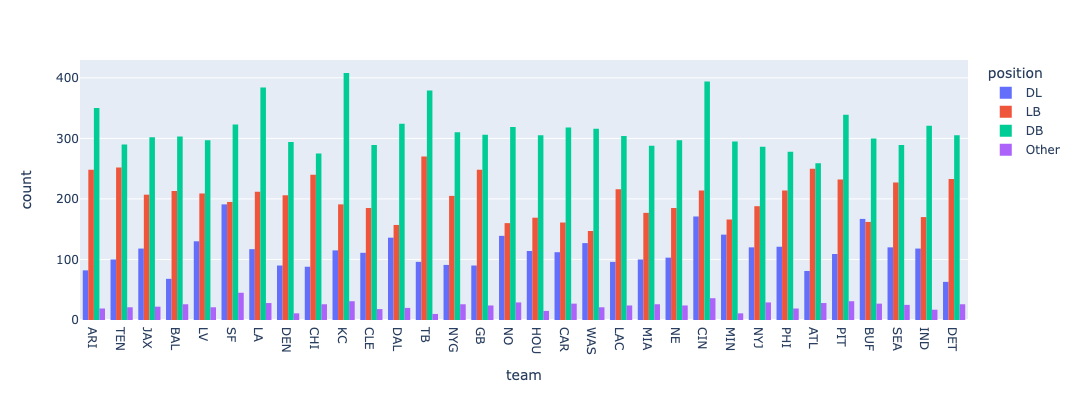

In [309]:
fig = px.histogram(df_solo_tackles, x="team",
             color='position', barmode='group', 
             height=400, category_orders=dict(position=["DL", "LB", "DB", "Other"]))
fig.show()

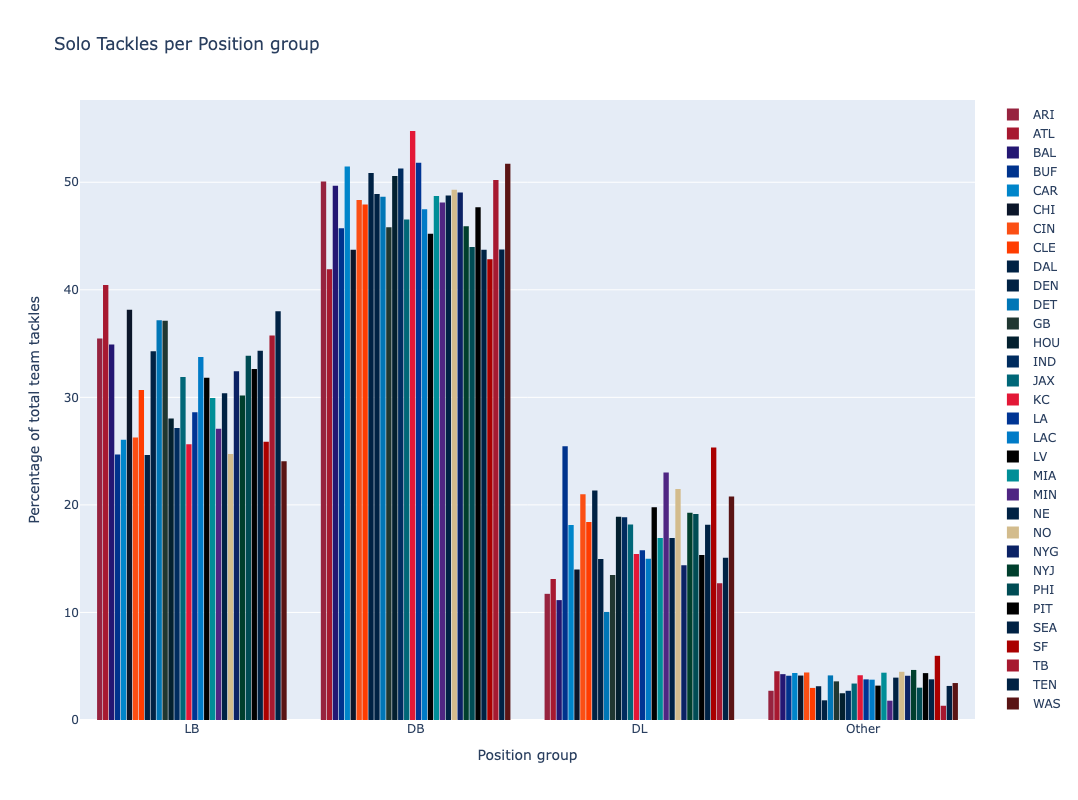

In [312]:
fig = go.Figure()

for i, team in enumerate(df_team_tackles['team'].values):
    df_team = df_solo_tackles[df_solo_tackles['team']==team]
    fig.add_trace(go.Histogram(
        x=df_team['position'],
        histnorm='percent',
        name=team, # name used in legend and hover labels
        marker_color=df_team_tackles.loc[i,'team_color']
    ))
    
fig.update_layout(
    title_text='Solo Tackles per Position group', # title of plot
    xaxis_title_text='Position group', # xaxis label
    yaxis_title_text='Percentage of total team tackles', # yaxis label
    bargap=0.15, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    height=800
)

fig.show()

### LA Chargers tackle distribution

In [313]:
df_st_LAC = df_solo_tackles[df_solo_tackles['team']=='LAC']

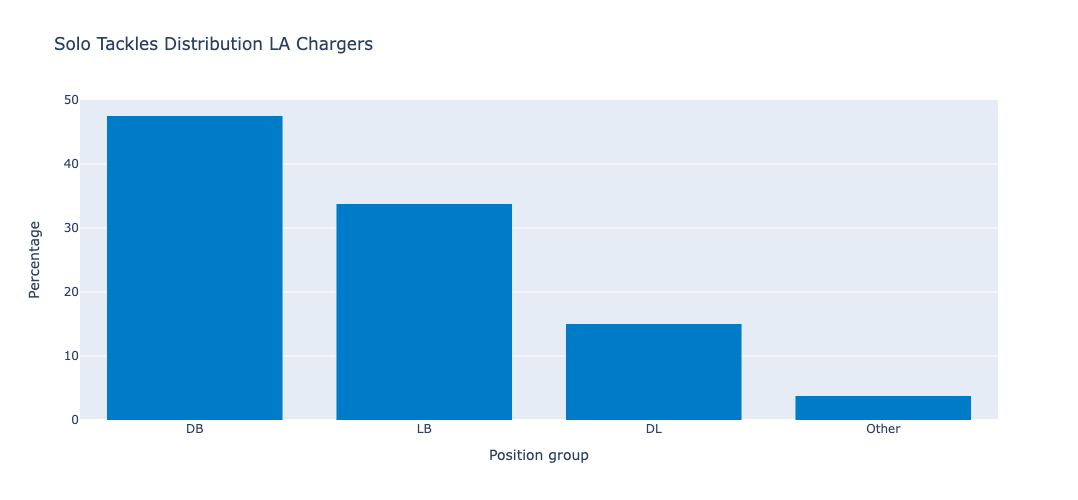

In [314]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_st_LAC['position'],
    histnorm='percent',
    # name=team, # name used in legend and hover labels
    marker_color=df_st_LAC['team_color'].values[0]
))

fig.update_xaxes(categoryorder='total descending')
    
fig.update_layout(
    title_text='Solo Tackles Distribution LA Chargers', # title of plot
    xaxis_title_text='Position group', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.15, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    height=500
)

fig.show()

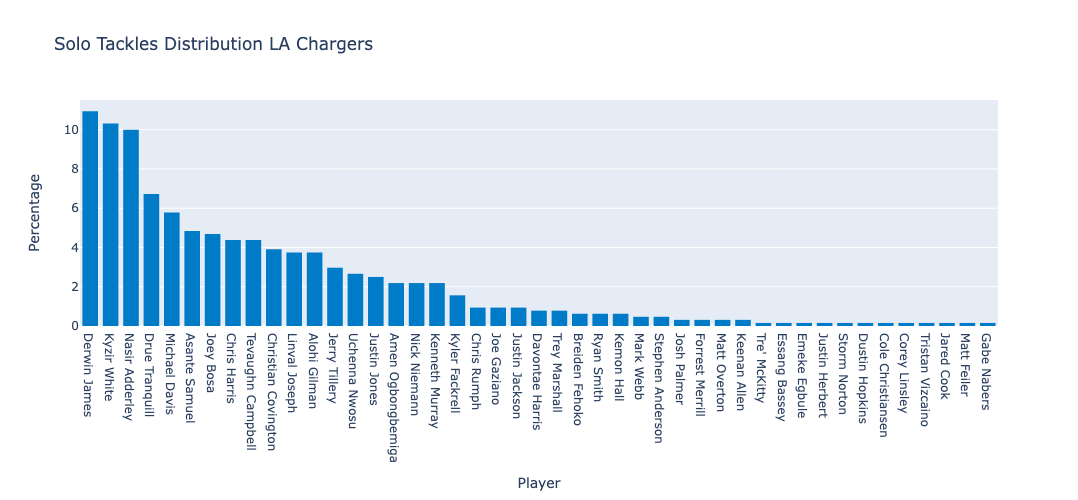

In [315]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df_st_LAC['player_name'],
    histnorm='percent',
    # name=team, # name used in legend and hover labels
    marker_color=df_st_LAC['team_color'].values[0]
)).update_xaxes(categoryorder='total descending')
    
fig.update_layout(
    title_text='Solo Tackles Distribution LA Chargers', # title of plot
    xaxis_title_text='Player', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.15, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    height=500
)

fig.show()

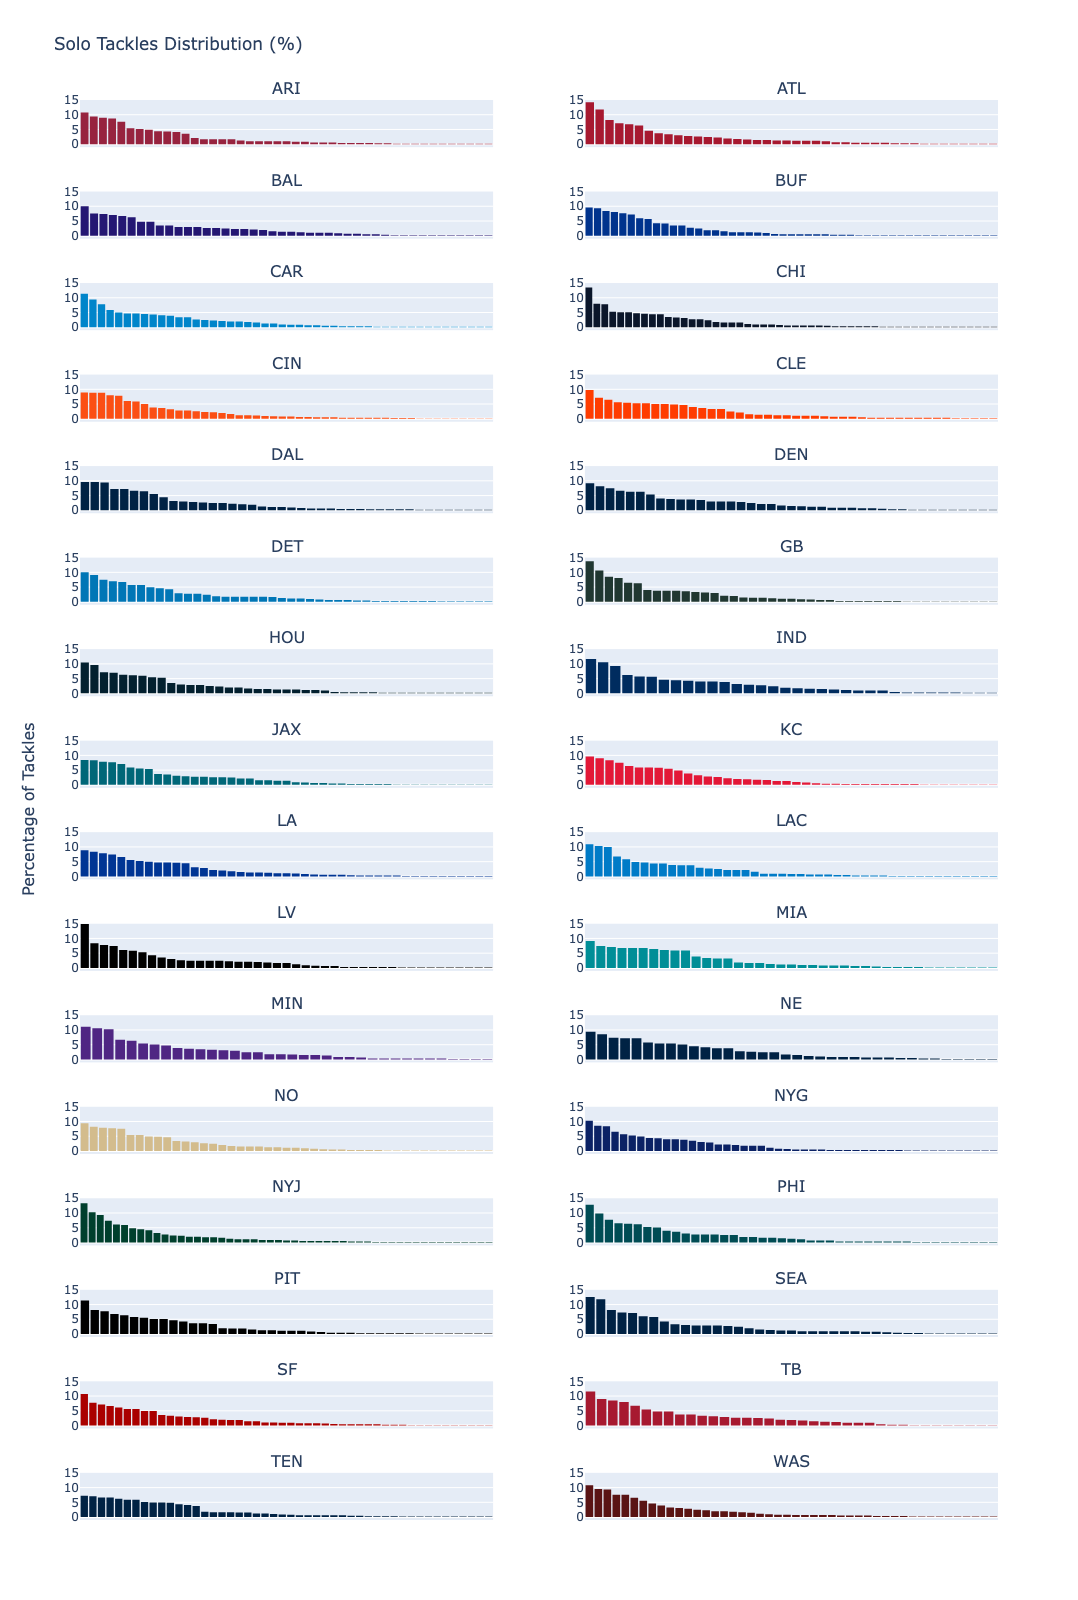

In [316]:
fig = make_subplots(rows=16, cols=2, y_title='Percentage of Tackles', subplot_titles=tuple(df_team_tackles['team'].values))

for i, team in enumerate(np.unique(df_solo_tackles['team'])):
    if i<16:
        j=1
    else:
        j=2
        
    df_team = df_solo_tackles[df_solo_tackles['team']==team]

    fig.add_trace(go.Histogram(
        x=df_team['player_name'],
        histnorm='percent',
        # name=team, # name used in legend and hover labels
        marker_color=df_team_tackles.loc[i,'team_color']
    ),row=math.floor(i/2)+1, col=i%2+1)
    
    fig.update_xaxes(row=math.floor(i/2)+1, col=i%2+1,
                     categoryorder='total descending',
                     showticklabels=False)
    fig.update_yaxes(range=[-1, 15], row=math.floor(i/2)+1, col=i%2+1)
    
fig.update_layout(
    title_text='Solo Tackles Distribution (%)', # title of plot
    bargap=0.15, # gap between bars of adjacent location coordinates
    height=1600,
    showlegend=False
)

fig.update_xaxes()

fig.show()